## Домашнее задание № 22
### Козел А.Г. 14.01.23

Датасет для ДЗ (ID_user1,ID_song,rating) задача предсказать факт взаимодействия (LightFM) и рейтинг (для SVD моделей). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import torch
import cornac
#import papermill as pm
#import scrapbook as sb
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import time

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


In [2]:

from lightfm.datasets import fetch_movielens
from lightfm import LightFM
from recsys import *
from sklearn import preprocessing
from scipy.sparse import coo_matrix
from scipy import sparse

In [3]:
df= pd.read_csv('songsDataset.csv', sep=',', encoding="cp1251") 

In [4]:
df

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5
...,...,...,...
1999995,199999,75840,2
1999996,199999,85921,1
1999997,199999,116763,1
1999998,199999,128758,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   'userID'  int64
 1   'songID'  int64
 2   'rating'  int64
dtypes: int64(3)
memory usage: 45.8 MB


In [6]:
df.nunique()

'userID'    200000
'songID'    127771
'rating'         5
dtype: int64

In [7]:
df.columns = ['userID','songID','rating']

In [8]:
len(df['userID'].value_counts())

200000

<AxesSubplot:>

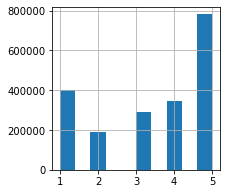

In [9]:
df.rating.hist(figsize=(3, 3))

In [10]:
df['rating'].value_counts()

5    780134
1    399243
4    344972
3    287831
2    187820
Name: rating, dtype: int64

## LightFM

* https://github.com/lyst/lightfm/blob/master/examples/quickstart/quickstart.ipynb
 * https://making.lyst.com/lightfm/docs/quickstart.html

In [11]:
from pandas.api.types import CategoricalDtype
from scipy import sparse

users = df["userID"].unique()
items = df["songID"].unique()
shape = (len(users), len(items))

# Create indices for users and movies
user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
items_cat = CategoricalDtype(categories=sorted(items), ordered=True)
user_index = df["userID"].astype(user_cat).cat.codes
item_index = df["songID"].astype(items_cat).cat.codes

# Conversion via COO matrix
coo = sparse.coo_matrix((df["rating"], (user_index, item_index)), shape=shape)
csr = coo.tocsr()

In [12]:
csr

<200000x127771 sparse matrix of type '<class 'numpy.int64'>'
	with 2000000 stored elements in Compressed Sparse Row format>

In [13]:
df_train, df_test = train_test_split(csr, train_size=0.5, random_state=42)

In [14]:
print(repr(df_train))
print(repr(df_test))

<100000x127771 sparse matrix of type '<class 'numpy.int64'>'
	with 1000000 stored elements in Compressed Sparse Row format>
<100000x127771 sparse matrix of type '<class 'numpy.int64'>'
	with 1000000 stored elements in Compressed Sparse Row format>


In [15]:
model = LightFM(loss='warp')
model.fit(df_train, epochs=30, num_threads=8)

In [16]:
from lightfm.evaluation import precision_at_k

In [17]:
print("Train precision: %.2f" % precision_at_k(model, df_train, k=10).mean())
print("Test precision: %.2f" % precision_at_k(model, df_test, k=10).mean())

In [18]:
from lightfm.evaluation import auc_score

In [19]:
print("Train precision: %.2f" % auc_score(model, df_train).mean())
print("Test precision: %.2f" % auc_score(model, df_test).mean())

## Почему не считает?